# Activity 4 - Fundamental Convolution Application

Import the necessary libraries.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from scipy.signal import wavelets

Programmatically generate a sinusoidal wave, running at 500hz, an amplitude of 5 volts, with a sampling rate of 100, starting at time 0 with 0 offset.

In [2]:
start_time = 0 # Specify the starting time at 0.
end_time = 1 # Specify the ending time at 1.
sample_rate = 100 # Specify a sample rate of 100.
time = np.arange(start=start_time, stop=end_time, step=1/sample_rate) # Create time routines using the arange() method.

theta = 0 # Specify the offset.
frequency = 500 # Specify the frequency at 500Hz.
amplitude = 5 # Set the amplitude to 5.

sinewave = amplitude * np.sin(2 * np.pi * frequency * time + theta) # Construct the sinewave and store in an array.
sinewave # Preview the generated sinewave array values.

array([ 0.00000000e+00, -6.12323400e-15, -1.22464680e-14, -5.38968388e-14,
       -2.44929360e-14,  4.91096681e-15, -1.07793678e-13, -7.83897748e-14,
       -4.89858720e-14, -3.03799063e-13,  9.82193362e-15, -2.44991258e-13,
       -2.15587355e-13, -1.86183452e-13, -1.56779550e-13, -4.11592741e-13,
       -9.79717439e-14, -6.85678411e-14, -6.07598127e-13, -9.76003555e-15,
        1.96438672e-14, -5.19386419e-13, -4.89982516e-13, -4.60578613e-13,
       -4.31174710e-13, -4.01770807e-13, -3.72366905e-13, -3.42963002e-13,
       -3.13559099e-13, -8.52589385e-13, -8.23185482e-13, -7.93781579e-13,
       -1.95943488e-13, -7.34973774e-13, -1.37135682e-13,  4.60702409e-13,
       -1.21519625e-12, -6.17358163e-13, -1.95200711e-14, -5.58550357e-13,
        3.92877345e-14, -4.99742551e-13, -1.03877284e-12, -4.40934746e-13,
       -9.79965032e-13, -3.82126940e-13, -9.21157226e-13, -3.23319135e-13,
       -8.62349420e-13, -1.40137971e-12, -8.03541615e-13, -2.05703523e-13,
       -7.44733809e-13, -

Plot the generated sinewave.

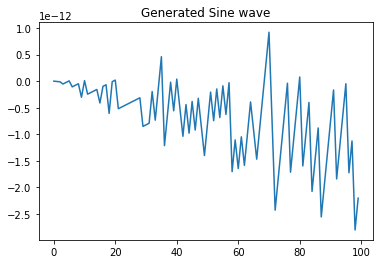

In [3]:
plt.plot(sinewave)
plt.title("Generated Sine wave")
plt.show()

Function to perform a convolution of two signals and generate the resulting plots and statistical analysis.

In [4]:
# Function convolving signals and takes the parameters of a main signal, kernel function to convolve with, and a label for the kernel function.
def convolveSignals(original_signal, original_signal_label, kernel_function, kernel_label):
    kernel_function = np.array(kernel_function) # Convert the kernel function from a normal array into a numpy array.
    result = np.convolve(original_signal, kernel_function) # Convolve the original signal and the kernel function.
    EXPORTS_PATH = './exports' # The 'exports/' path in the current directory.
    
    # Statistical Analysis
    analysis_df = pd.DataFrame(columns=['Signal', 'Mean', 'Standard Deviation', 'Standard Error']) # Create a new data frame to store the analysis summary.
    
    original_signal_mean = original_signal.mean() # Calculate the mean of the original signal.
    original_signal_std = original_signal.std() # Calculate the standard deviation of the original signal.
    original_signal_sem = original_signal.std() / np.sqrt(np.size(original_signal)) # Calculate the standard error of the original signal.
    original_new_entry = {'Signal':original_signal_label, 'Mean':original_signal_mean, 'Standard Deviation':original_signal_std, 'Standard Error':original_signal_sem} # Create a dictionary for the entry to be added to the analysis dataframe.
    analysis_df = analysis_df.append(original_new_entry, ignore_index=True) # Add the entry to the analysis dataframe.
    
    kernel_function_mean = kernel_function.mean() # Calculate the mean of the kernel function.
    kernel_function_std = kernel_function.std() # Calculate the standard deviation of the kernel function.
    kernel_function_sem = kernel_function.std() / np.sqrt(np.size(kernel_function)) # Calculate the standard error of the kernel function.
    kernel_new_entry = {'Signal':"Kernel Function {}".format(kernel_label), 'Mean':kernel_function_mean, 'Standard Deviation':kernel_function_std, 'Standard Error':kernel_function_sem} # Create a dictionary for the entry to be added to the analysis dataframe.
    analysis_df = analysis_df.append(kernel_new_entry, ignore_index=True) # Add the entry to the analysis dataframe.
    
    result_mean = result.mean() # Calculate the mean of the result of the convolved signals.
    result_std = result.std() # Calculate the standard deviation of the result of the convolved signals.
    result_sem = result.std() / np.sqrt(np.size(result)) # Calculate the standard error of the result of the convolved signals.
    result_new_entry = {'Signal':"Resulting Signal", 'Mean':result_mean, 'Standard Deviation':result_std, 'Standard Error':result_sem} # Create a dictionary for the entry to be added to the analysis dataframe.
    analysis_df = analysis_df.append(result_new_entry, ignore_index=True) # Add the entry to the analysis dataframe.
    
    EXPORTS_SUMMARY_PATH = './{}/summary'.format(EXPORTS_PATH) # The 'exports/summary/' path in the current directory.
    if not os.path.exists(EXPORTS_SUMMARY_PATH):
            os.makedirs(EXPORTS_SUMMARY_PATH) # Create the 'exports/images/' directory if it does not exists.
    
    CSV_FILE_NAME = "SUMMARY-signal({})-kernel({})".format(original_signal_label, kernel_label) # File name for the .csv file.
    analysis_df.to_csv('./{}/{}.csv'.format(EXPORTS_SUMMARY_PATH, CSV_FILE_NAME), index=False) # Exporting the file to current directory.
    
    
    # Plots
    fig = plt.figure(figsize=(20, 5)) # Set figure size.
    plt.subplots_adjust(wspace= 0.20, hspace= 0.50) # Adjust the spacing of subplots.

    original_signal_plt = fig.add_subplot(2,2,1) # Place the plot of the original signal on the first cell of the first row.
    plt.title("Original Signal ({})".format(original_signal_label)) # Add subplot title.
    original_signal_plt.plot(original_signal, color="blue") # Plot the original signal with the color set to blue.

    kernel_function_plt = fig.add_subplot(2,2,2) # Place the plot of the kernel function on the second cell of the second row.
    plt.title("Kernel Function: {}".format(kernel_label)) # Add subplot title.
    kernel_function_plt.plot(kernel_function, color="red") # Plot the kernel function with the color set to red.

    resulting_signal_plt = fig.add_subplot(2,2,(3,4)) # Place the plot of the resulting signal on the second row occupying two columns.
    plt.title("Resulting Signal") # Add subplot title.
    resulting_signal_plt.plot(result, color="purple") # Plot the resulting signal with the color set to violet.

    EXPORTS_IMAGES_PATH = './{}/images'.format(EXPORTS_PATH) # The 'exports/images/' path in the current directory.
    if not os.path.exists(EXPORTS_IMAGES_PATH):
            os.makedirs(EXPORTS_IMAGES_PATH) # Create the 'exports/images/' directory if it does not exists.
        
    FIG_FILE_NAME = "PLOT-signal({})-kernel({})".format(original_signal_label, kernel_label) # File name for the figure.
    fig.savefig("{}/{}.png".format(EXPORTS_IMAGES_PATH, FIG_FILE_NAME)) # Save the figure.
    
    # Display analysis of the original signal.
    print("Original Signal") # Display Signal indicator.
    print("mean: {}".format(original_signal_mean)) # Display the mean.
    print("standard deviation: {}".format(original_signal_std)) # Display the standard deviation.
    print("standard error: {}".format(original_signal_sem)) # Display the standard error.
    print("\n") # Add line break separation.
    
    # Display analysis of the kernel function.
    print("Kernel Function: {}".format(kernel_label)) # Display Signal indicator.
    print("mean: {}".format(kernel_function_mean)) # Display the mean.
    print("standard deviation: {}".format(kernel_function_std)) # Display the standard deviation.
    print("standard error: {}".format(kernel_function_sem)) # Display the standard error.
    print("\n") # Add line break separation.
    
    # Display analysis of the resulting signal.
    print("Resulting Signal") # Display Signal indicator.
    print("mean: {}".format(result_mean)) # Display the mean.
    print("standard deviation: {}".format(result_std)) # Display the standard deviation.
    print("standard error: {}".format(result_sem)) # Display the standard error.
    print("\n") # Add line break separation.

### Perform a convolution of both the sine wave and the generated arrays.

Create 10-element arrays containing the specific kernel functions.

In [5]:
A = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # Kernel function A.
B = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] # Kernel function B.
C = [-1, -1, -1, -1, -1, 0, 0, 0, 0, 0] # Kernel function C.
D = [0, 0, 0, 0, 0, -1, -1, -1, -1, -1] # Kernel function D.
E = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1] # Kernel function E.
F = [0, 0, 0.5, 0.5, 1, 1, 0.5, 0.5, 0, 0] # Kernel function F.
G = [0, 0, -0.5, -0.5, -1, -1, -0.5, -0.5, 0, 0] # Kernel function G.

Plot the kernel functions.

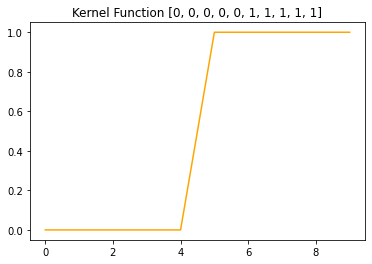

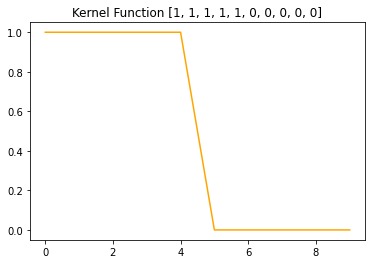

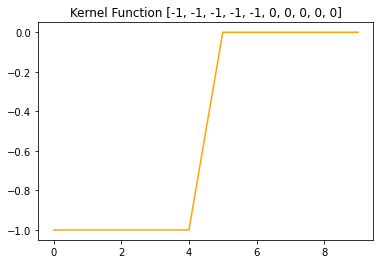

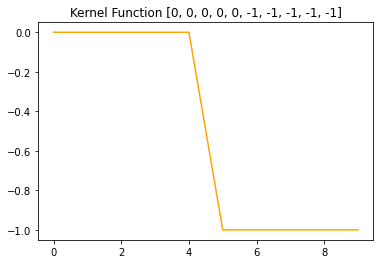

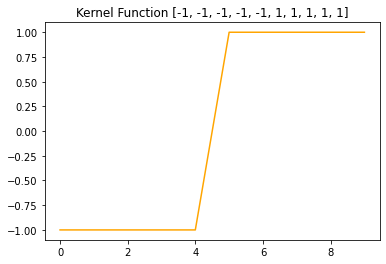

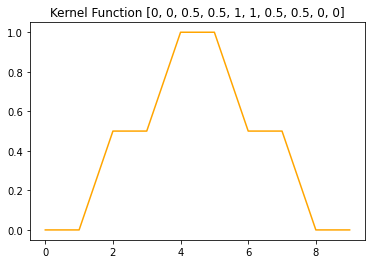

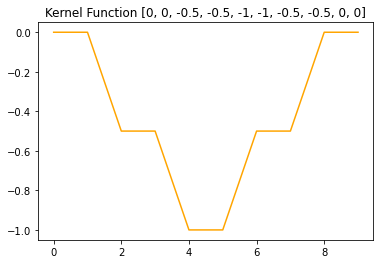

In [6]:
kernels = [A, B, C, D, E, F, G] # Store the kernel functions into an array for iteration.

for kernel in kernels:
    plt.plot(kernel, color="orange") # Plot the kernel.
    plt.title("Kernel Function {}".format(kernel)) # Set the array values as the plot title. 
    plt.show() # Show the plot.

#### Convolution of the generated sine wave and kernel function A.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: A
mean: 0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: -3.139019543689283e-12
standard deviation: 2.2742978240694986e-12
standard error: 2.1783822363150356e-13




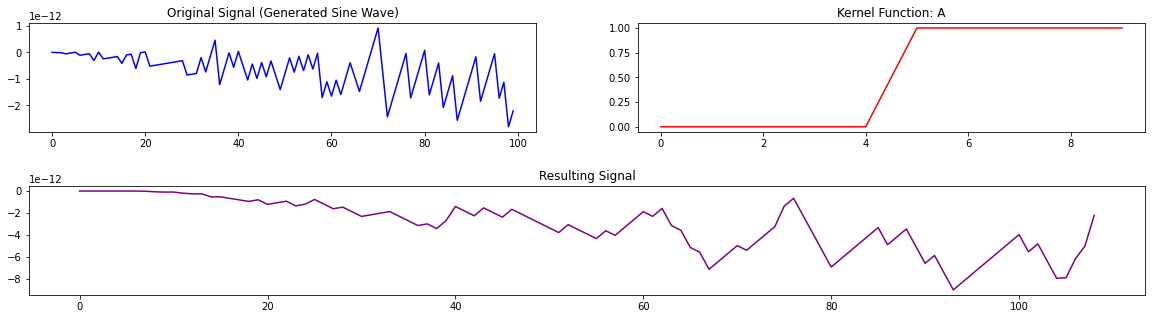

In [7]:
a = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=A, kernel_label="A")

#### Convolution of the generated sine wave and kernel function B.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: B
mean: 0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: -3.139019543689283e-12
standard deviation: 2.2742978240694982e-12
standard error: 2.178382236315035e-13




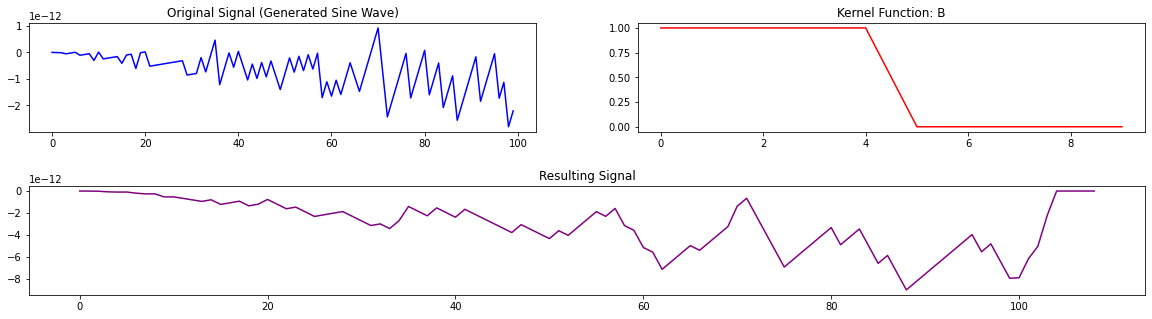

In [8]:
b = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=B, kernel_label="B")

#### Convolution of the generated sine wave and kernel function C.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: C
mean: -0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: 3.139019543689283e-12
standard deviation: 2.2742978240694982e-12
standard error: 2.178382236315035e-13




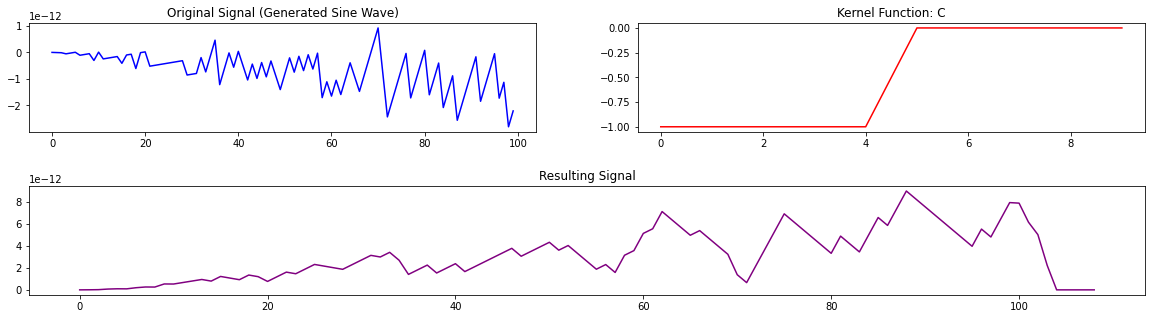

In [9]:
c = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=C, kernel_label="C")

#### Convolution of the generated sine wave and kernel function D.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: D
mean: -0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: 3.139019543689283e-12
standard deviation: 2.2742978240694986e-12
standard error: 2.1783822363150356e-13




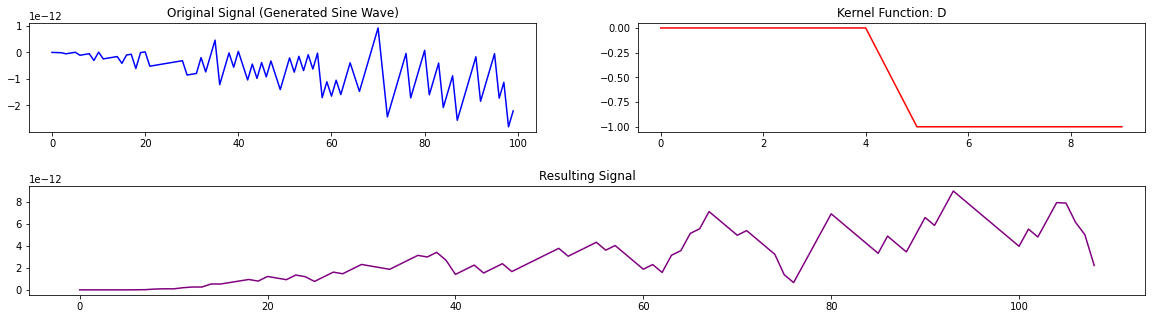

In [10]:
d = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=D, kernel_label="D")

#### Convolution of the generated sine wave and kernel function E.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: E
mean: 0.0
standard deviation: 1.0
standard error: 0.31622776601683794


Resulting Signal
mean: -1.482190031094158e-29
standard deviation: 2.3785525110113205e-12
standard error: 2.2782401158254147e-13




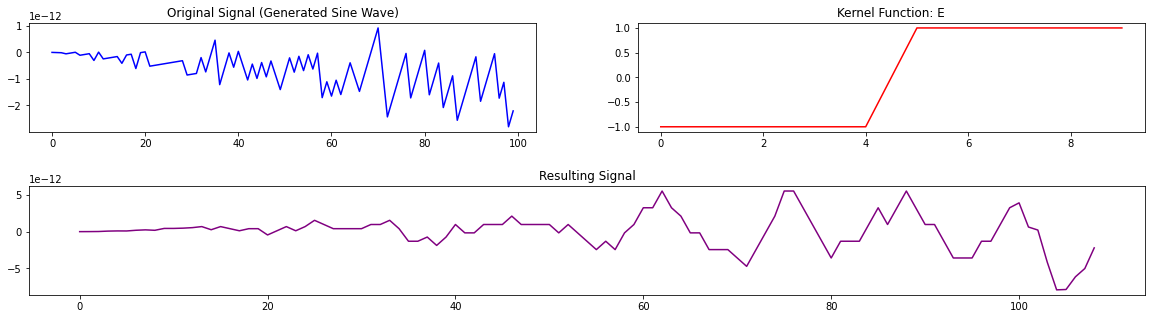

In [11]:
e = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=E, kernel_label="E")

#### Convolution of the generated sine wave and kernel function F.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: F
mean: 0.4
standard deviation: 0.37416573867739417
standard error: 0.11832159566199232


Resulting Signal
mean: -2.511215634951426e-12
standard deviation: 1.7982620136851588e-12
standard error: 1.722422624422363e-13




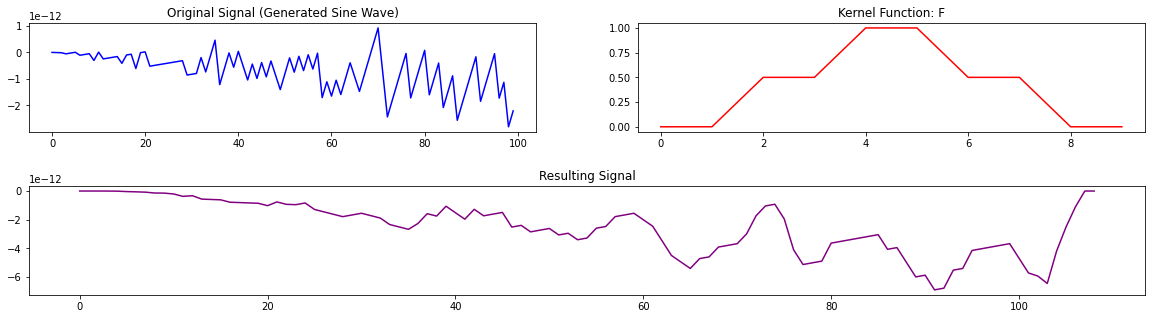

In [12]:
f = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=F, kernel_label="F")

#### Convolution of the generated sine wave and kernel function G

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: G
mean: -0.4
standard deviation: 0.37416573867739417
standard error: 0.11832159566199232


Resulting Signal
mean: 2.511215634951426e-12
standard deviation: 1.7982620136851588e-12
standard error: 1.722422624422363e-13




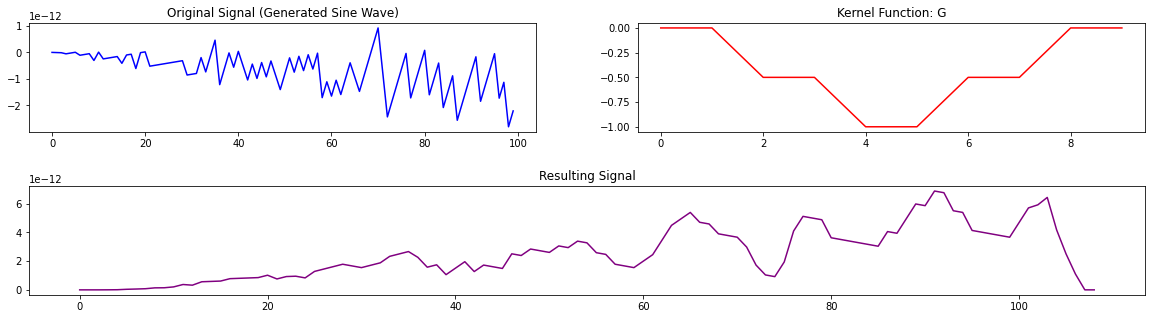

In [13]:
g = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=G, kernel_label="G")

### Perform a convolution of both the sine wave and the new set of kernel arrays.

Generate another set of kernel arrays using the scipy wavelet library to convolve with the sine wave.

In [14]:
daubechie_wavelet = wavelets.daub(8) # Daubechie wavelet.
morlet_wavelet = wavelets.morlet2(20,4,2) # Morlet wavelet.
ricker_wavelet = wavelets.ricker(20,1) # Ricker wavelet.

Plot the generated wavelets.

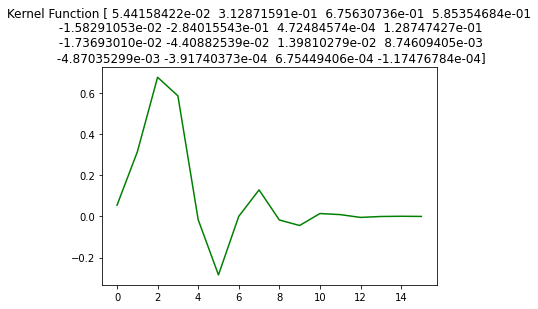

c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


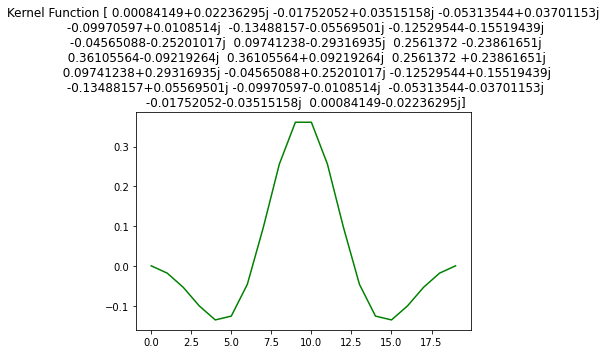

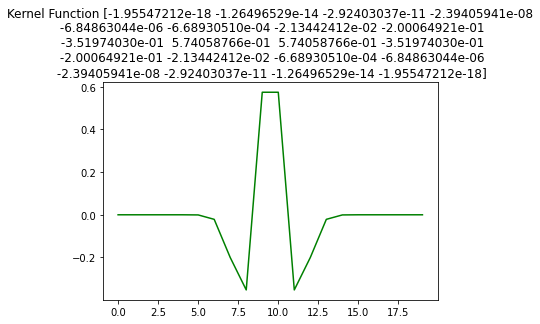

In [15]:
wavelets = [daubechie_wavelet, morlet_wavelet, ricker_wavelet] # Store the kernel functions into an array for iteration.

for wavelet in wavelets:
    plt.plot(wavelet, color="green") # Plot the wavelet.
    plt.title("Kernel Function {}".format(wavelet)) # Set the array values as the plot title. 
    plt.show() # Show the plot.

#### Convolution of the generated sine wave and kernel function Daubechie wavelet.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: Daubechie wavelet
mean: 0.08838834764831845
standard deviation: 0.2338535866733715
standard error: 0.058463396668342875


Resulting Signal
mean: -8.415262560436784e-13
standard deviation: 8.488921898915868e-13
standard error: 7.915960487515542e-14




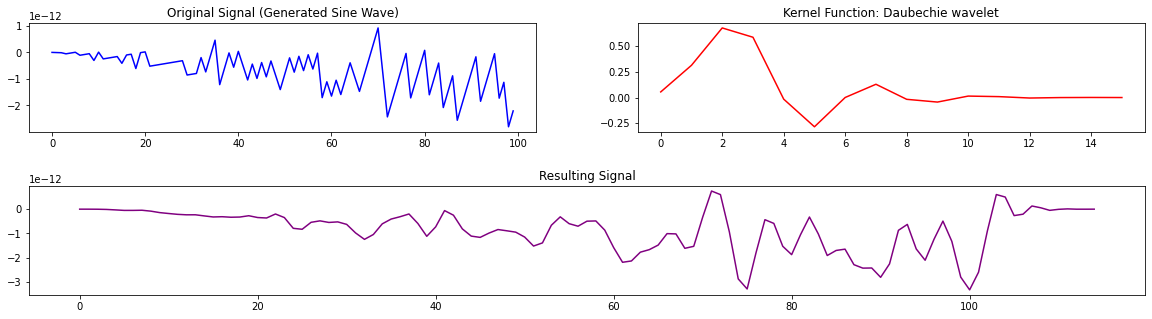

In [16]:
dw = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=daubechie_wavelet, kernel_label="Daubechie wavelet")

#### Convolution of the generated sine wave and kernel function Morlet wavelet.

c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: Morlet wavelet
mean: (0.023925690473745282+2.688821387764051e-18j)
standard deviation: 0.22228041651067418
standard error: 0.04970341213848341


Resulting Signal
mean: (-2.7516806350503587e-13-6.788181234842992e-30j)
standard deviation: 7.684654611314441e-13
standard error: 7.044511332372862e-14




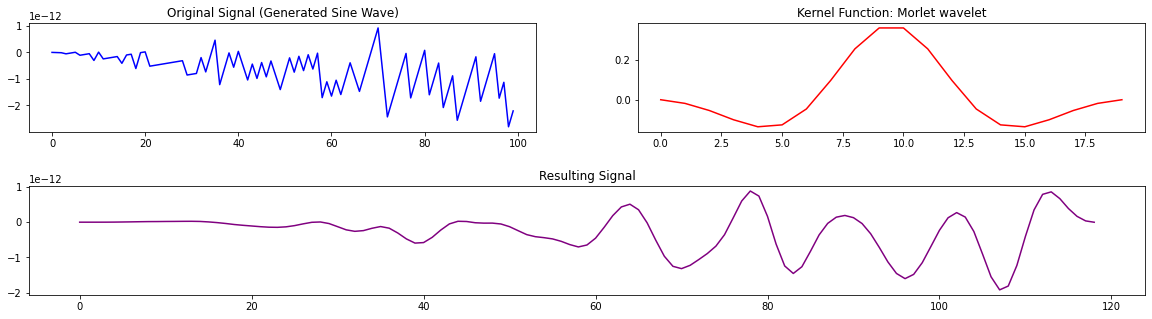

In [17]:
mw = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=morlet_wavelet, kernel_label="Morlet wavelet")

#### Convolution of the generated sine wave and kernel function Ricker wavelet.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: Ricker wavelet
mean: -2.2961598085130707e-08
standard deviation: 0.22224112623996306
standard error: 0.04969462656686696


Resulting Signal
mean: 2.640800894815112e-19
standard deviation: 5.89653603197521e-13
standard error: 5.4053457181843675e-14




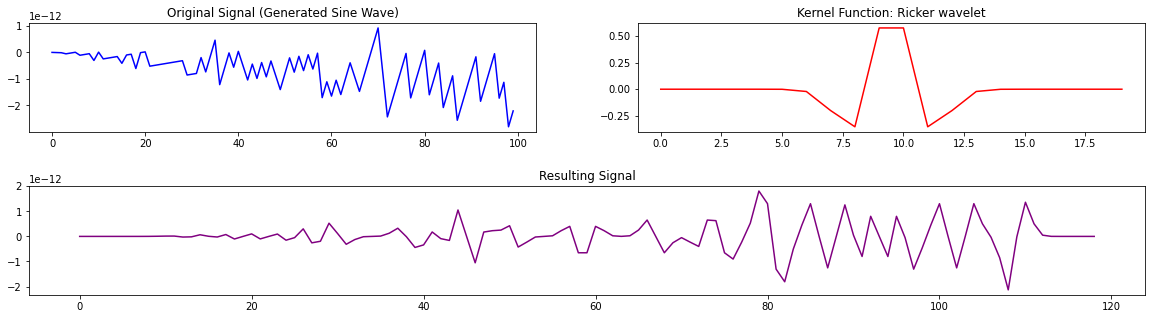

In [18]:
rw = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=ricker_wavelet, kernel_label="Ricker wavelet")